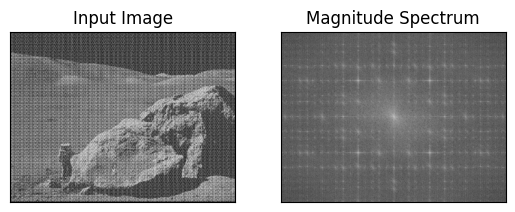

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
 
img = cv.imread('periodic_noise.jpg', cv.IMREAD_GRAYSCALE)
 
dft = cv.dft(np.float32(img),flags = cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
 
magnitude_spectrum = 20*np.log(cv.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
 
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

In [2]:
#Filter creating
# Low pass filter
mask = np.zeros((img.shape[0],img.shape[1],2),np.uint8)
centerX, centerY = (int(img.shape[0] / 2),int(img.shape[1] / 2))
mask[centerX-50:centerX+50, centerY - 50:centerY+50,:] = 1

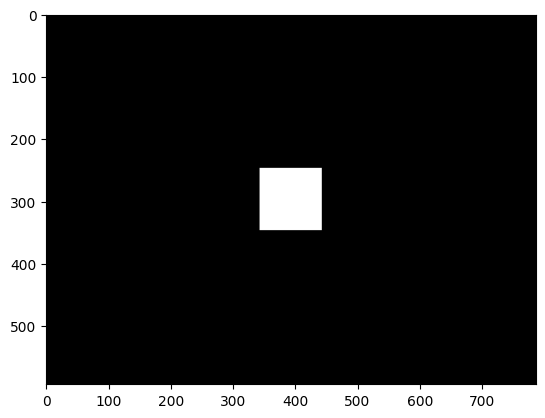

In [3]:
plt.imshow(mask[:,:,0], cmap = 'gray')

In [4]:
# Filtering
dft_shift = dft_shift*mask

In [ ]:
filtering_magn_res = 20*np.log(cv.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
plt.imshow(filtering_magn_res, cmap='gray')

In [6]:
#fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(dft_shift)
img_back = cv.idft(f_ishift)
img_back = cv.magnitude(img_back[:,:,0],img_back[:,:,1])

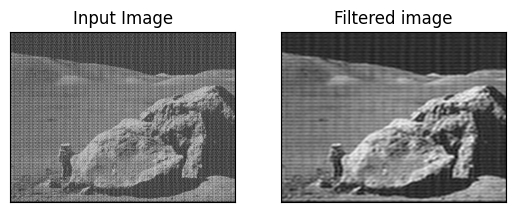

In [7]:
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Filtered image'), plt.xticks([]), plt.yticks([])
plt.show()

In [9]:
# Реализуйте высокочастотную фильтрацию на основе ядра Гаусса
# Реализуйте удаление периодического шума

In [14]:
# 1. Реализуйте высокочастотную фильтрацию на основе ядра Гаусса
import numpy as np
import cv2 as cv
#from random import randint
from matplotlib import pyplot as plt
image = cv.imread('periodic_noise.jpg', cv.IMREAD_GRAYSCALE)
dft = cv.dft(np.float32(image), flags=cv.DFT_COMPLEX_OUTPUT)    # преобразование Фурье
dft_shift = np.fft.fftshift(dft)                                # сдвиг нулевых частот в центр массива

In [15]:
# фильтр высоких частот = 1 - низкочастотный фильтр Гаусса

In [16]:
sigma = 30 # "сигма" : в результирующем изображении отображает сглаживание  

In [17]:
# получение сетки x и y изображения
rows, cols = image.shape
x, y = np.meshgrid(np.arange(0, cols, 1), np.arange(0, rows, 1))

gauss_mask = np.exp(-((x - (cols // 2))**2 + (y - (rows // 2))**2) / (2 * sigma**2))

mask_res = 1 - gauss_mask

In [18]:
print(gauss_mask)

[[2.83635701e-59 4.38693848e-59 6.77765789e-59 ... 6.77765789e-59
  4.38693848e-59 2.83635701e-59]
 [3.94309099e-59 6.09870249e-59 9.42227006e-59 ... 9.42227006e-59
  6.09870249e-59 3.94309099e-59]
 [5.47558032e-59 8.46897406e-59 1.30842521e-58 ... 1.30842521e-58
  8.46897406e-59 5.47558032e-59]
 ...
 [7.59523052e-59 1.17473960e-58 1.81492928e-58 ... 1.81492928e-58
  1.17473960e-58 7.59523052e-59]
 [5.47558032e-59 8.46897406e-59 1.30842521e-58 ... 1.30842521e-58
  8.46897406e-59 5.47558032e-59]
 [3.94309099e-59 6.09870249e-59 9.42227006e-59 ... 9.42227006e-59
  6.09870249e-59 3.94309099e-59]]


In [19]:
dft_shift = dft_shift * mask_res[:, :, np.newaxis]              # применение фильтра (добавить размерность)

In [20]:
image_idft = cv.idft(np.fft.ifftshift(dft_shift))               # обратный сдвиг нулевых частот + обратное преобразование Фурье
image_idft = cv.magnitude(image_idft[:,:,0], image_idft[:,:,1]) 

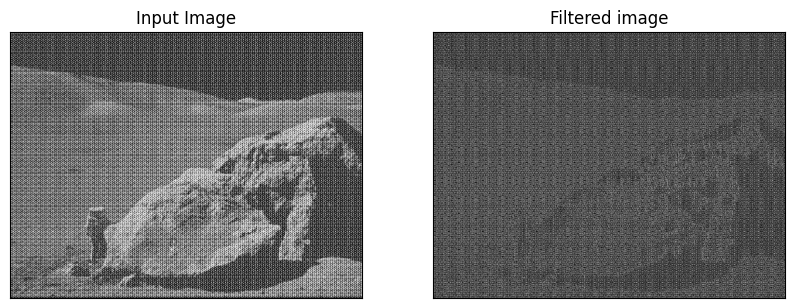

In [21]:
plt.figure(figsize = (10, 5))
plt.subplot(121),plt.imshow(image, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(image_idft, cmap = 'gray')
plt.title('Filtered image'), plt.xticks([]), plt.yticks([])
plt.show()

In [22]:
# 2. Реализуйте удаление периодического шума

In [23]:
from skimage.feature import peak_local_max

In [24]:
dft = cv.dft(np.float32(image), flags=cv.DFT_COMPLEX_OUTPUT)    # преобразование Фурье
dft_shift = np.fft.fftshift(dft)                                # сдвиг нулевых частот в центр массива

In [25]:
magnitude_spectrum = 20*np.log(cv.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
local_maxum = peak_local_max(magnitude_spectrum, min_distance=15, threshold_abs=200)

In [26]:
rows, cols = image.shape
mask = np.copy(dft_shift)
mask[:, :, :] = 1

for i in local_maxum:
    r = np.int32(((i[0]-rows//2)**2+(i[1]-cols//2)**2)**(1/2))
    cv.circle(mask, (rows//2, cols//2), r, (0,0))

In [28]:
dft_shift = dft_shift * mask  # применение фильтра (добавить размерность)

In [30]:
image_idft = cv.idft(np.fft.ifftshift(dft_shift))   # обратный сдвиг нулевых частот + обратное преобразование Фурье
image_idft = cv.magnitude(image_idft[:,:,0], image_idft[:,:,1])

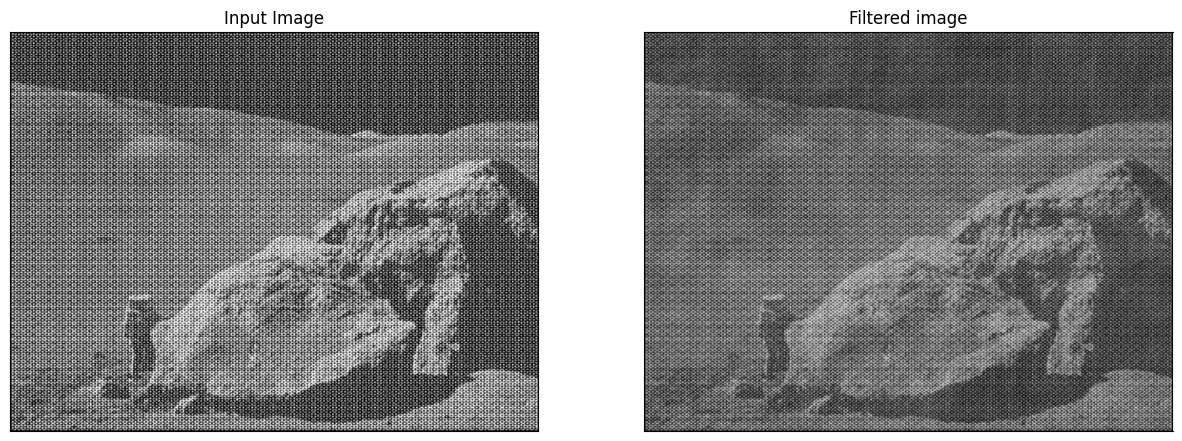

In [31]:
plt.figure(figsize = (15, 8))
plt.subplot(121),plt.imshow(image, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(image_idft, cmap = 'gray')
plt.title('Filtered image'), plt.xticks([]), plt.yticks([])
plt.show()